# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import norm
from scipy.stats import ttest_ind
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
medical['insuranceclaim']

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [5]:
n = len(medical.charges)
#print(n)

In [6]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__
We can see that this data sample is skewed right, not normally distributed, which means statistics like mean and standard deviation may not be a very effective way of describing this dataset. It might be wise to eliminate some of the outliers or log the data in order to make the data more manageable.  Ultimately though, given that the sample size is so large (1,338 samples), it is fair to use the methods pertaining to a normal distribution to make inferences on this dataset. 

In [7]:
mc = medical.charges
print(mc)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


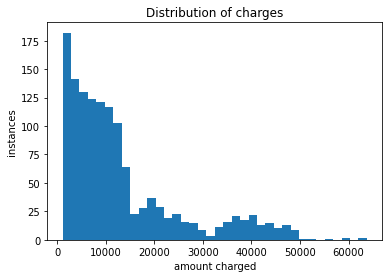

In [8]:
_ = plt.hist(mc, bins=36)
_ = plt.xlabel('amount charged')
_ = plt.ylabel('instances')
_ = plt.title('Distribution of charges')

In [9]:
less_than_12 = len(medical.query('charges < 12000'))
less_than_12 / n

0.6322869955156951

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
Looking at count of records above, we see that 63% of charges are below 12,000, so this is a common occurnce.

Below I calculate the t-statistic (which must be used for this sample) to determine that the likelihood of the average charge being below 12,000 is 54%.  Therefore there is a reasonable chance that this event could occur.

This makes sense in looking at the histogram. The mean is distorted up by the outliers on the higher end (charges ranging all the way up to $63.7K). There is a bigger cluster of values below 12,000

In [10]:
mc_mean = np.mean(mc)
print(mc_mean)

13270.422265141257


In [11]:
mc_std = np.std(mc, ddof=1)
print(mc_std)

12110.011236693994


In [12]:
#calculate t-statistic
t_stat = (mc_mean-12000) / (mc_std/np.sqrt(1))
print(t_stat)

0.10490677839272418


In [13]:
norm.cdf(t_stat)

0.5417751098642324

Brainstorm (not part of solution):
- Show % of values that are below 12,000
- t-test is most appropriate given that we don't know anything about the population
- given skewness, does it make more sense to use?: log of data, samples of sample, a distribution with mean of 12,000
- given that the sample size is so large, it is probably safe to use methods that are typically used with normal distributinos

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
Since we are looking at values that are 12,000 or less, it is appropriate to use a one-sided interval.

In [14]:
t_critical = t.ppf(0.95, n-1)

In [15]:
standard_error = mc_std / np.sqrt(n) # should this be np.sqrt(n-1)?
print(standard_error)

331.06745431568226


In [16]:
MOE = t_critical * standard_error
print(MOE)

544.9350813250251


In [17]:
UpperBound = round(mc_mean + MOE, 0)
LowerBound = round(mc_mean - MOE, 0)
#print(LowerBound)
print(LowerBound, UpperBound)
#print(UpperBound)

12725.0 13815.0


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__
- __state that the null hypothesis:__ people with insurance are not charged a different amount than people without insurance. More specifically:

average charge for patients with insurance is equal to the average charge for patients without insurance

- __state that the alternate hypothesis:__ people with insurance are charged a different amount than people without insurance. More specifically:

average charge for patients with insurance is not equal to the average charge for patients without insurance


- __assumptions about the variances of the two groups:__ TBD ???



__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

- We will assume a 95% confidence interval for this test
- Given that we are trying to determine if the two averages are equal to each other, this should be a two-sided test.

In [18]:
count = medical.groupby('insuranceclaim')['charges'].count()
print(count)

insuranceclaim
0    555
1    783
Name: charges, dtype: int64


In [19]:
#medical.query('insuranceclaim = 1')
subset = medical.query('insuranceclaim == 1')
subset.head(20)
#print(subset)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
4,32,1,28.880,0,0,1,3866.85520,1
6,46,0,33.440,1,0,2,8240.58960,1
10,25,1,26.220,0,0,0,2721.32080,1
11,62,0,26.290,0,1,2,27808.72510,1
12,23,1,34.400,0,0,3,1826.84300,1
13,56,0,39.820,0,0,2,11090.71780,1
14,27,1,42.130,0,1,2,39611.75770,1
16,52,0,30.780,1,0,0,10797.33620,1


In [20]:
### ASK WHY THIS DOESN'T WORK PROPERLY - KEEPS RETURNING AN EMPTY SET
#barnet = medical[medical["region"]=="1"]
#subset2 = medical[medical['insuranceclaim']=='1']
#medical['insuranceclaim']=='1'
#medical['insuranceclaim'].value_counts()
#subset2 = medical[medical['insuranceclaim'] == 1]
mci = medical.charges[medical['insuranceclaim'] == 1]
print(mci)
#medical.info()


0       16884.92400
1        1725.55230
4        3866.85520
6        8240.58960
10       2721.32080
           ...     
1330    12629.16560
1331    10795.93733
1334     2205.98080
1335     1629.83350
1337    29141.36030
Name: charges, Length: 783, dtype: float64


In [21]:
mci_std = mci.std()

In [22]:
mcui = medical.charges[medical['insuranceclaim'] == 0]
print(mcui)


2        4449.46200
3       21984.47061
5        3756.62160
7        7281.50560
8        6406.41070
           ...     
1324     4239.89265
1328    22395.74424
1332    11411.68500
1333    10600.54830
1336     2007.94500
Name: charges, Length: 555, dtype: float64


when value counts worked just now:

1    783
0    555

In [23]:
# declare variaables
n0 = mcui.count()
s0 = np.std(mcui, ddof=1)
n1 = mci.count()
s1 = np.std(mci, ddof=1)
x0 = np.mean(mcui)
x1 = np.mean(mci)

print(n0)
print(s0)
print(n1)
print(s1)
print(x0)
print(x1)

555
6446.510126811736
783
14045.928418802127
8821.421892306294
16423.928276537663


In [24]:
(n0-1)*(s0**2)

23022851019.557793

In [25]:
# calculate pooled standard deviation
pooled_std = np.sqrt(((n0-1)*(s0**2) + (n1-1)*(s1**2)) / (n0+n1-2))

print(pooled_std)

11520.034268775256


In [26]:
# calculate t-test statistic
t_test = (x0 - x1) / (pooled_std*np.sqrt(((1/n0) + (1/n1))))

print(t_test)

-11.89329903087671


In [35]:
# calculate p-value
p_value = norm.cdf(t_test) * 2
print(p_value)

1.2823915835130306e-32


### QUESTION - not getting the same p-value as below

In [28]:
# calculate using scipy
ttest_ind(mcui, mci)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

### question - t-stastics above 11 seems like a really high value.
### questoin - how do we interpret the really low p-value

In [29]:
deg_free = n0 + n1 - 2
print(deg_free)

1336


#### use this calculator to get critical value: https://www.omnicalculator.com/statistics/critical-value
critical value is 1.9617 - if the test statistic falls is greater than this, we can reject the null

### FINAL ANSWER: Comparing the t-test value of -11.89 to our critical value of -1.9617, we conclude that we can reject the null hypothesis that those patients with insurance are charged the same as those without insurance

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
Yes, there are z-tests in the documentation, however we did not use a z-test in this approach, because it is required to know the population standard deviation in order to utilize a z-test.  

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test